In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
df = pd.read_csv('house_data_cleaned.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,bed_bath_sum,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,4.00,0,6830,6990,"(47.5112, -122.257)",7.714868
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,5.25,1,9812,9329,"(47.721, -122.319)",7.766476
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,3.00,0,10770,10782,"(47.7379, -122.233)",10.107949
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,7.00,0,6960,6360,"(47.5208, -122.393)",6.655340
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,5.00,0,9760,9303,"(47.6168, -122.045)",13.578402


In [4]:
df6 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view']]

In [5]:
df6.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
0,221900.0,1180,7,1180,1340,1.00,0.0
1,538000.0,2570,7,2170,1690,2.25,0.0
2,180000.0,770,6,770,2720,1.00,0.0
3,604000.0,1960,7,1050,1360,3.00,0.0
4,510000.0,1680,8,1680,1800,2.00,0.0


In [6]:
abs(df6.corr()) > .8

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
price,True,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False
grade,False,False,True,False,False,False,False
sqft_above,False,True,False,True,False,False,False
sqft_living15,False,False,False,False,True,False,False
bathrooms,False,False,False,False,False,True,False
view,False,False,False,False,False,False,True


## Notes on above
- at .7 correlation, clearly sqft_living is the best predictor, for it is correlated with everything but view
- at .8 correlation, now sqft_living only correlate with sqft_above
- first test, remove sqft_above, and see outcome!

## Test[1] : dropping sqft_above

In [7]:
X1 = df6[['sqft_living', 'grade', 'sqft_living15', 'bathrooms',
       'view']]
y1 = df6['price']

In [8]:
predictors = np.asarray(X1) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y1,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     5809.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:13:53   Log-Likelihood:            -2.9819e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21591   BIC:                         5.964e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -5.5e+05   1.29e+04    -42.756      0.000   -5.75e+05   -5.25e+05
x1           182.8500      3.596     50.851      0.000     175.802     189.898
x2          9.896e+04   2335.091     42.378      0.000    9.44e+04    1.04e+05
x3            -2.7493      3.876     -0.709      0.478     -10.347       4.849
x4         -3.059e+04   3330.820     -9.185      0.000   -3.71e+04   -2.41e+04
x5          9.579e+04   2240.663     42.751      0.000    9.14e+04       1e+05
==============================================================================
Omnibus:                    16620.975   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1088824.458
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      37.205   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
""" Now using Sklearn"""
ss = StandardScaler()

X1_scaled = ss.fit_transform(X1)

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
np.random.seed(33)

X1_train,X1_test,y1_train,y1_test = train_test_split(X1_scaled,y1)

In [11]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lr.score(X1_test,y1_test) #r**2 value

0.5815117275967299

In [13]:
lr.coef_

array([161493.65221168, 118316.48323463,   3152.76714081, -25662.7335309 ,
        69021.0727499 ])

In [14]:
r_2 = metrics.r2_score(y1_test, lr.predict(X1_test))
vif = 1/(1-r_2)
mae = metrics.mean_absolute_error(y1_test, lr.predict(X1_test))
mse = metrics.mean_squared_error(y1_test, lr.predict(X1_test))

In [15]:
#PRICE vs. TOP 6 dropping sqft_above #test size is .25
print(f'Our list of predictors: {X1.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view'], dtype='object')
The R-squared score of our test is 0.5815117275967299
The MAE score of our test is 157595.44542674246
The MSE score of our test is 60759037804.78902
The RMSE score of our test is $246493.4843049386


#### Next Steps: Run K-Fold Cross Validation for Test[1] (dropping sqft_above)

In [16]:
cv_5_results = cross_val_score(lr, X1_scaled, y1, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X1_scaled, y1, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X1_scaled, y1, cv=20, scoring="neg_mean_squared_error")

In [17]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: {sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 240493.94515642093
CV10 - MEAN of 10 RMSE's: 240456.46109558034
CV20 - MEAN of 20 RMSE's: 240238.46212853253


##  Test[1] Observations: dropping sqft_above
- Our key metric, RMSE, went up slightly after dropping sqft_above
- Our secondary model quality metric R-squared decreased slightly after dropping sqft_above
- Our other secondary model quality metrics MSE & MAE unfortunately increased slightly after dropping sqft_above
- After testing model quality with K-folds cross validation (k=5,10,20), our model's RSME increases, indicating our benchmark model is still the superior one
- **Test 1 did not improve our model, keep sqft_above**

## Test[2]: add in 'distance_from_flatiron' (new feature engineered from lat & long)

In [18]:
X2 = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]
y2 = df['price']

In [19]:
predictors = np.asarray(X2) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model2 = sm.OLS(y2,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     6320.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:13:53   Log-Likelihood:            -2.9535e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21589   BIC:                         5.908e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.569e+05   1.23e+04    -20.884      0.000   -2.81e+05   -2.33e+05
x1           157.2367      3.979     39.515      0.000     149.437     165.036
x2          7.039e+04   2145.790     32.803      0.000    6.62e+04    7.46e+04
x3            41.2734      4.015     10.280      0.000      33.404      49.143
x4            39.9793      3.477     11.500      0.000      33.165      46.794
x5         -1.488e+04   2928.004     -5.083      0.000   -2.06e+04   -9144.232
x6          8.241e+04   2014.555     40.907      0.000    7.85e+04    8.64e+04
x7         -1.814e+04    227.619    -79.716      0.000   -1.86e+04   -1.77e+04
==============================================================================
Omnibus:                    19389.543   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2150446.369
Skew:                           3.880   Prob(JB):                         0.00
Kurtosis:                      51.265   Cond. No.                     3.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
""" Now using Sklearn"""
ss = StandardScaler()

X2_scaled = ss.fit_transform(X2)

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
np.random.seed(33)

X2_train,X2_test,y2_train,y2_test = train_test_split(X2_scaled,y2)

In [22]:
lr.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lr.score(X2_test,y2_test) #r**2 value

0.6755779569205969

In [24]:
lr.coef_

array([ 137716.88436796,   85031.03786096,   34399.45769707,
         32262.68581817,  -13351.37300781,   59142.80946922,
       -121648.06805235])

In [25]:
r_2 = metrics.r2_score(y2_test, lr.predict(X2_test))
mae = metrics.mean_absolute_error(y2_test, lr.predict(X2_test))
mse = metrics.mean_squared_error(y2_test, lr.predict(X2_test))

In [26]:
#PRICE vs. TOP 6 + distance_from_flatiron  #test size is .25
print(f'Our list of predictors: {X2.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.6755779569205969
The MAE score of our test is 132135.80168051203
The MSE score of our test is 47101848438.83408
The RMSE score of our test is $217029.60267860716


In [27]:
cv_5_results = cross_val_score(lr, X2_scaled, y2, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X2_scaled, y2, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X2_scaled, y2, cv=20, scoring="neg_mean_squared_error")

In [28]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: ${sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 210789.83742773952
CV10 - MEAN of 10 RMSE's: 210801.22241987867
CV20 - MEAN of 20 RMSE's: $210691.4784360575


## Test[2] Observations: adding distance_from_flatiron

- After RSME decreases by a significant amount (approx. $30K, decrease in RSME of 12.5%)
- **Test[2] improved our model significantly, we should keep 'distance_from_flatiron' in our model**

## Reassessing correlation matrix to find the optimal next feature to drop

In [29]:
df7 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]

In [30]:
abs(df7.corr()) > .75

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,distance_from_flatiron
price,True,False,False,False,False,False,False,False
sqft_living,False,True,True,True,True,True,False,False
grade,False,True,True,True,False,False,False,False
sqft_above,False,True,True,True,False,False,False,False
sqft_living15,False,True,False,False,True,False,False,False
bathrooms,False,True,False,False,False,True,False,False
view,False,False,False,False,False,False,True,False
distance_from_flatiron,False,False,False,False,False,False,False,True


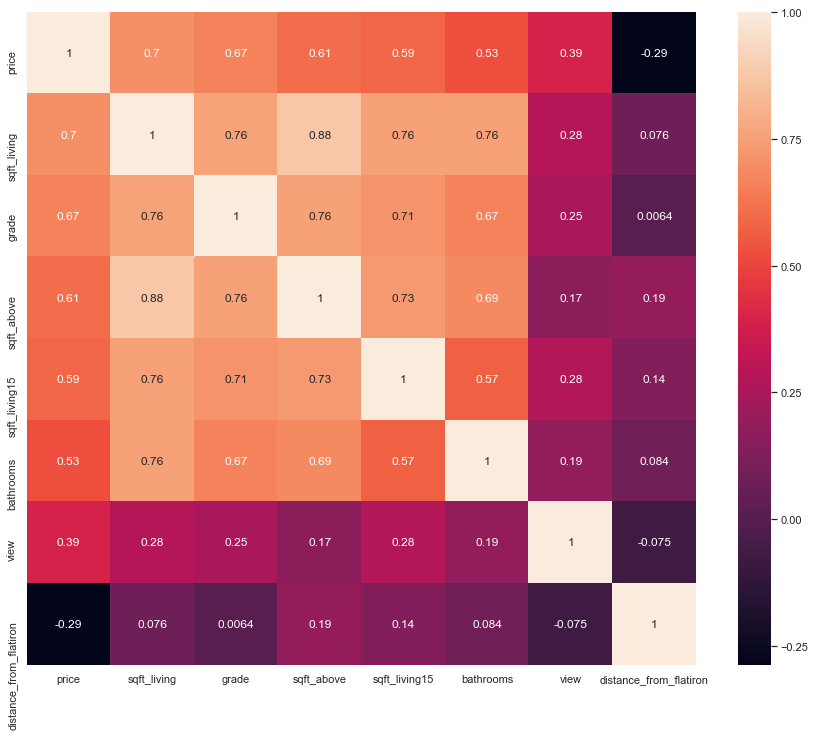

In [31]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(df7.corr(), annot=True)

- grade has high correlation with sqft_living (currently understood as our best predictor of price) and sqft_above (which Test[1] suggests we should keep in our model for now
- dropping grade may reduce our model's collinearity, let's try it!

## Test[3]: drop grade

In [32]:
X3 = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]
y3 = df['price']

In [33]:
predictors = np.asarray(X3) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model3 = sm.OLS(y3,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     6853.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:13:55   Log-Likelihood:            -2.9588e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21590   BIC:                         5.918e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.063e+05   5493.175     19.352      0.000    9.55e+04    1.17e+05
x1           165.1775      4.069     40.589      0.000     157.201     173.154
x2            76.5032      3.964     19.302      0.000      68.734      84.272
x3            73.6965      3.403     21.658      0.000      67.027      80.366
x4          6551.5022   2924.357      2.240      0.025     819.546    1.23e+04
x5          8.688e+04   2059.371     42.188      0.000    8.28e+04    9.09e+04
x6         -1.963e+04    228.587    -85.855      0.000   -2.01e+04   -1.92e+04
==============================================================================
Omnibus:                    17992.478   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1543550.808
Skew:                           3.502   Prob(JB):                         0.00
Kurtosis:                      43.819   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
""" Now using Sklearn"""
ss = StandardScaler()

X3_scaled = ss.fit_transform(X3)

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
np.random.seed(33)

X3_train,X3_test,y3_train,y3_test = train_test_split(X3_scaled,y3)

In [36]:
lr.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lr.score(X3_test,y3_test) #r**2 value

0.6630560547182283

In [38]:
lr.coef_

array([ 145233.21719084,   64362.99251029,   55832.88402495,
          3835.2050749 ,   62742.88991393, -131811.40052588])

In [39]:
r_2 = metrics.r2_score(y3_test, lr.predict(X3_test))
mae = metrics.mean_absolute_error(y3_test, lr.predict(X3_test))
mse = metrics.mean_squared_error(y3_test, lr.predict(X3_test))

In [40]:
#PRICE vs. TOP 7, but dropping grade #test size is .25
print(f'Our list of predictors: {X3.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
       'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.6630560547182283
The MAE score of our test is 137136.42099187843
The MSE score of our test is 48919865285.35741
The RMSE score of our test is $221178.35627691378


In [41]:
cv_5_results = cross_val_score(lr, X3_scaled, y3, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X3_scaled, y3, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X3_scaled, y3, cv=20, scoring="neg_mean_squared_error")

In [42]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: ${sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 215958.6148155962
CV10 - MEAN of 10 RMSE's: 215955.31790222926
CV20 - MEAN of 20 RMSE's: $215841.46532420482


## Test[3] Observations: dropping 'grade'

- Dropping 'grade' increased our RMSE from 210K to 215K, and dropped our R-squared slightly
- **Test[3] did not improve our model, X2 from Test[2] is still our best set of predictors**

## Test[4]: Feature Engineer 'yr_last_constructed' & add to our current best model (X2 variable set from Test[2])

In [43]:
#FEATURE ENGINEERING: 'yr_last_constructed'
df['yr_last_constructed'] = df[['yr_built', 'yr_renovated']].max(axis=1)

In [44]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13,2014-12-09,2015-02-25,2014-12-09,2015-02-18
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


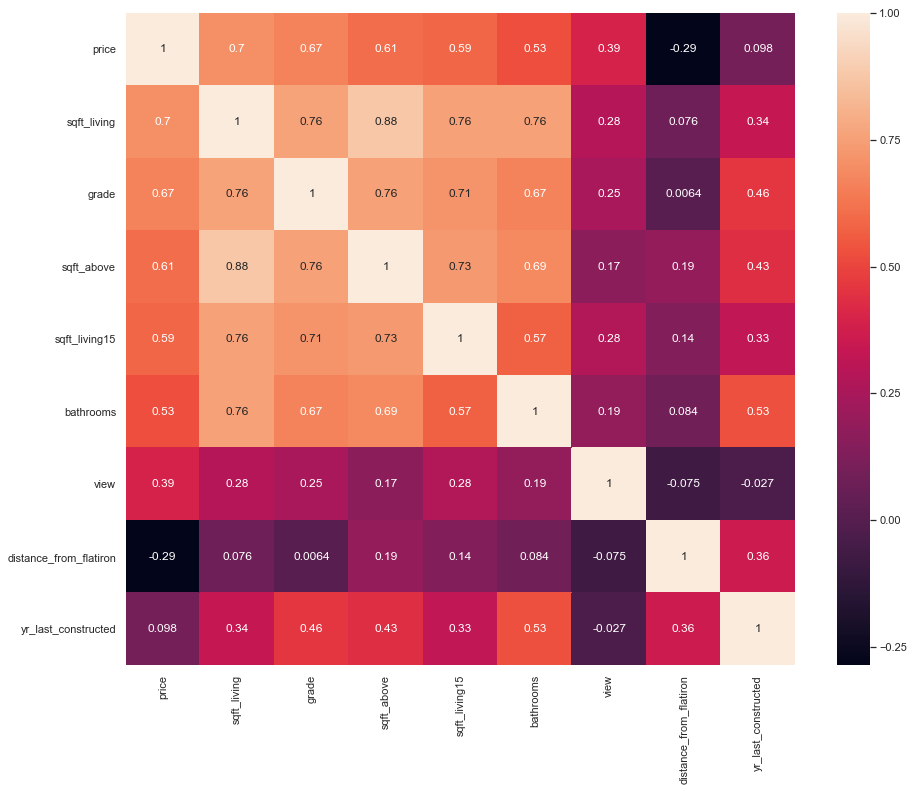

In [45]:
#CORRELATION ANALYSIS WITH NEW VARIABLE 'yr_last_constructed'
df8 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron', 'yr_last_constructed']]

sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(df8.corr(), annot=True)

In [46]:
#RUNNING NEW MODEL QUALITY TEST USING X2 Variables PLUS NEW FEATURE 'yr_last_constucted'
X4 = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron','yr_last_constructed']]
y4 = df['price']

In [47]:
predictors = np.asarray(X4) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model4 = sm.OLS(y4,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     5727.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:13:57   Log-Likelihood:            -2.9510e+05
No. Observations:               21597   AIC:                         5.902e+05
Df Residuals:                   21588   BIC:                         5.903e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.613e+06   1.27e+05     20.634      0.000    2.37e+06    2.86e+06
x1           132.8499      4.076     32.596      0.000     124.861     140.838
x2          8.484e+04   2213.470     38.329      0.000    8.05e+04    8.92e+04
x3            52.2068      3.996     13.063      0.000      44.373      60.040
x4            37.6156      3.437     10.944      0.000      30.878      44.353
x5           1.57e+04   3190.058      4.920      0.000    9443.587    2.19e+04
x6          7.785e+04   2000.898     38.906      0.000    7.39e+04    8.18e+04
x7         -1.608e+04    242.494    -66.321      0.000   -1.66e+04   -1.56e+04
x8         -1537.1452     67.513    -22.768      0.000   -1669.476   -1404.814
==============================================================================
Omnibus:                    19679.614   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2340027.846
Skew:                           3.956   Prob(JB):                         0.00
Kurtosis:                      53.377   Cond. No.                     3.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
""" Now using Sklearn"""
ss = StandardScaler()

X4_scaled = ss.fit_transform(X4)

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
np.random.seed(33)

X4_train,X4_test,y4_train,y4_test = train_test_split(X4_scaled,y4)

In [50]:
lr.fit(X4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lr.score(X4_test,y4_test) #r**2 value

0.6837323425695527

In [52]:
lr.coef_

array([ 115840.40218205,  101395.40497798,   43169.66688582,
         30809.68465594,    9827.6858844 ,   55760.38547153,
       -107966.21775611,  -43559.44766147])

In [53]:
r_2 = metrics.r2_score(y4_test, lr.predict(X4_test))
mae = metrics.mean_absolute_error(y4_test, lr.predict(X4_test))
mse = metrics.mean_squared_error(y4_test, lr.predict(X4_test))

In [54]:
#PRICE vs. TOP 7, adding 'yr_last_constructed' #test size is .25
print(f'Our list of predictors: {X4.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'distance_from_flatiron', 'yr_last_constructed'],
      dtype='object')
The R-squared score of our test is 0.6837323425695527
The MAE score of our test is 129865.17760581287
The MSE score of our test is 45917938019.85273
The RMSE score of our test is $214284.71252017195


In [55]:
cv_5_results = cross_val_score(lr, X4_scaled, y4, cv=5, scoring="neg_mean_squared_error")
cv_10_results = cross_val_score(lr, X4_scaled, y4, cv=10, scoring="neg_mean_squared_error")
cv_20_results = cross_val_score(lr, X4_scaled, y4, cv=20, scoring="neg_mean_squared_error")

In [56]:
print(f"CV5 - MEAN of 5 RMSE's: {sqrt(-1*np.mean(cv_5_results))}")
print(f"CV10 - MEAN of 10 RMSE's: {sqrt(-1*np.mean(cv_10_results))}")
print(f"CV20 - MEAN of 20 RMSE's: ${sqrt(-1*np.mean(cv_20_results))}")

CV5 - MEAN of 5 RMSE's: 208312.66315426675
CV10 - MEAN of 10 RMSE's: 208277.06293843163
CV20 - MEAN of 20 RMSE's: $208195.42170075644


## Test[4] Observations: creating & adding 'yr_last_constructed' feature

- We created a new column 'yr_last_constructed' from the maximum between 'yr_built' & 'yr_renovated' & added it to our best performing model thus far which used the variable set X2 back in Test[2]
- Our new variable set includes 8 features
- Our R-squared improved slightly from .675 to .684
- Our RMSE improved from 210K to 208K
- **Test[4] improved our model slightly. This is our best model thus far.**

## Next: Assess shape of current predictor variables to look for candidates for normalization

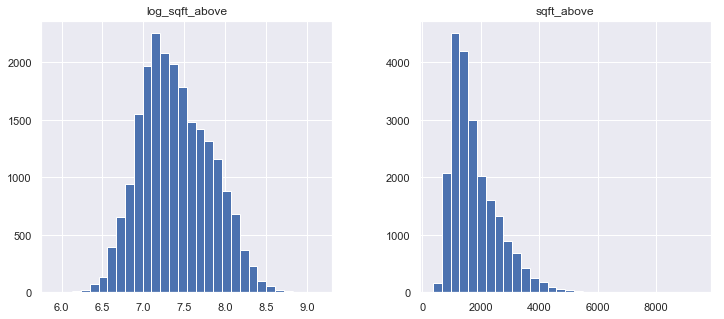

In [57]:
df['log_sqft_above'] = np.log(df['sqft_above'])

#df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
   #    'view','distance_from_flatiron','yr_last_constructed']].hist(figsize=(12,12),bins=30);
df[['sqft_above', 'log_sqft_above']].hist(figsize=(12,5),bins=30);

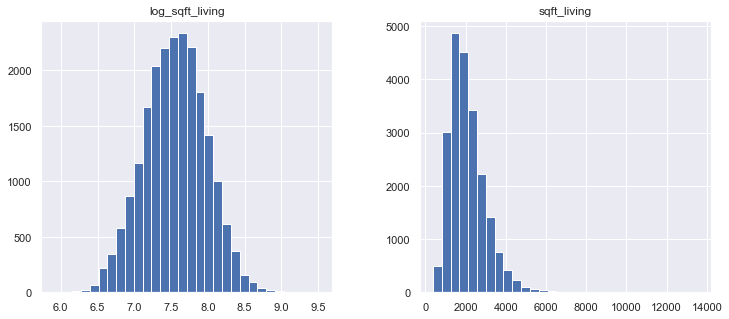

In [58]:
df['log_sqft_living'] = np.log(df['sqft_living'])

#df[['log_sqft_living', 'grade', 'log_sqft_above', 'sqft_living15', 'bathrooms',
#    'view','distance_from_flatiron','yr_last_constructed']].hist(figsize=(12,12),bins=30);
df[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5),bins=30);

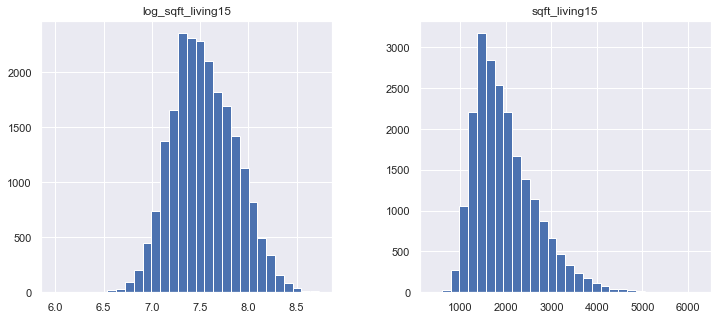

In [59]:
df['log_sqft_living15'] = np.log(df['sqft_living15'])

#df[['log_sqft_living', 'grade', 'log_sqft_above', 'sqft_living15', 'bathrooms',
#    'view','distance_from_flatiron','yr_last_constructed']].hist(figsize=(12,12),bins=30);
df[['sqft_living15', 'log_sqft_living15']].hist(figsize=(12,5),bins=30);


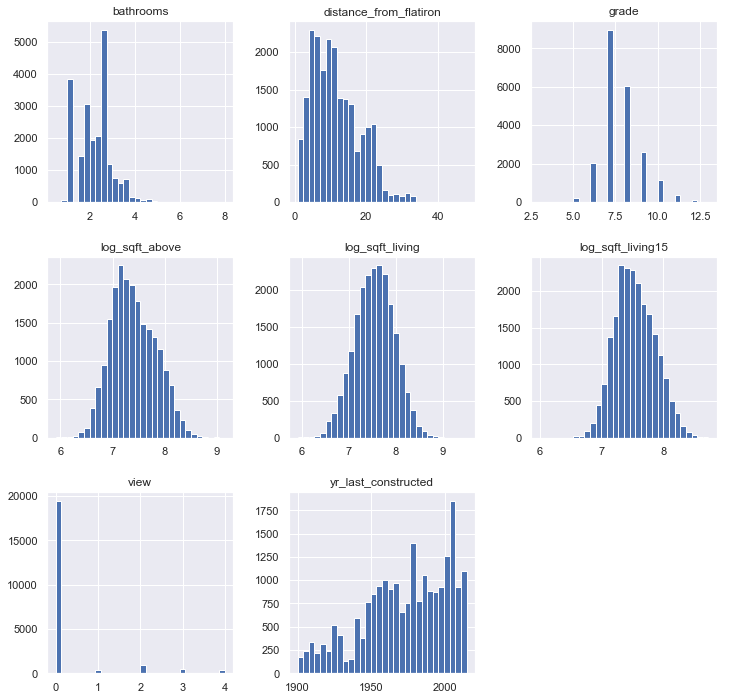

In [60]:
#df['sqrt_yr_last_constructed'] = (df['yr_last_constructed'])**(1/2)

df[['log_sqft_living', 'grade', 'log_sqft_above', 'log_sqft_living15', 'bathrooms',
    'view','distance_from_flatiron','yr_last_constructed']].hist(figsize=(12,12),bins=30);
#df[['yr_last_constructed', 'sqrt_yr_last_constructed']].hist(figsize=(12,5),bins=30);

In [61]:
#DROP TRANSFORMATIONS THAT DIDN'T WORK
#df = df.drop(columns=['log_view','log_distance_from_flatiron','log_yr_last_constructed','x**3_yr_last_constructed',
#                     'x**(1/3)_yr_last_constructed','log_bathrooms','sqrt_yr_last_constructed'])

In [62]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13,2014-12-09,2015-02-25,2014-12-09,2015-02-18
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


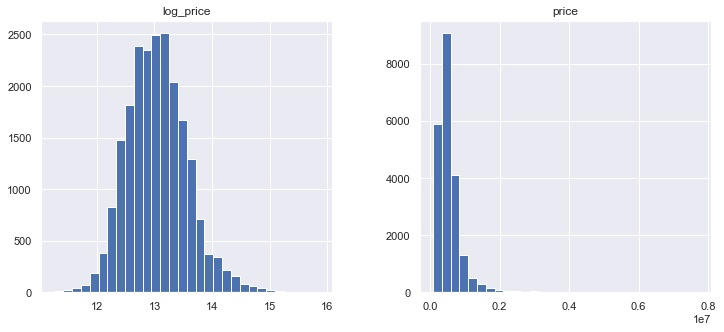

In [63]:
df['log_price'] = np.log(df['price'])
df[['price', 'log_price']].hist(figsize=(12,5),bins=30);

In [64]:
#df.to_csv('house_data_cleaned_for_test5')

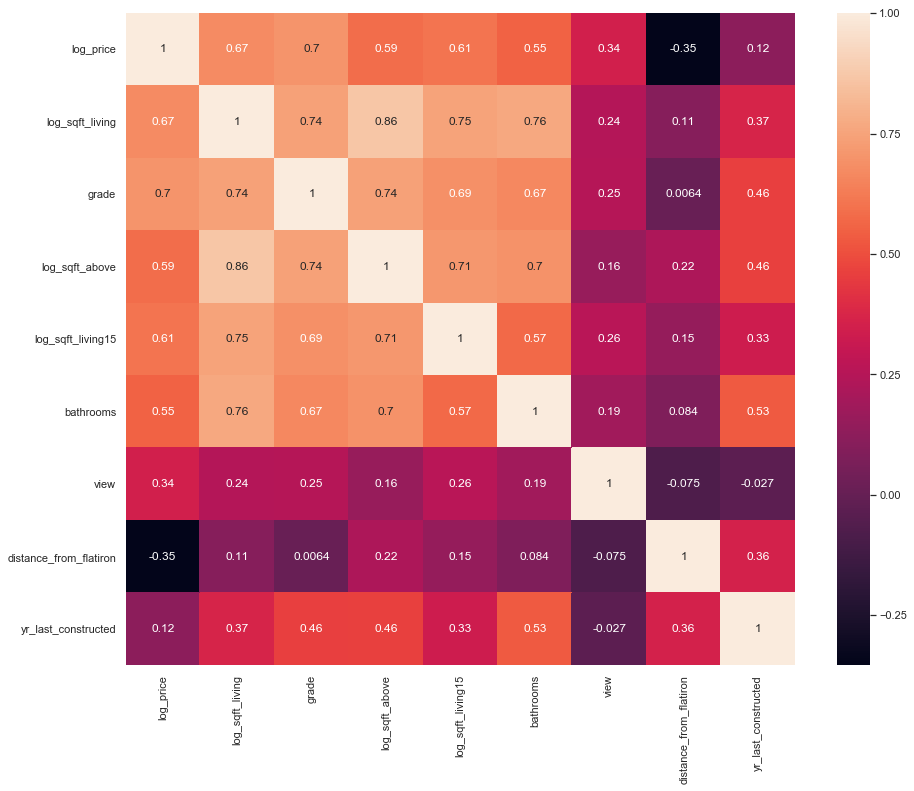

In [65]:
T5_df = df[['log_price','log_sqft_living', 'grade', 'log_sqft_above', 'log_sqft_living15', 'bathrooms',
    'view','distance_from_flatiron','yr_last_constructed']]

sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(T5_df.corr(), annot=True)

## NORMALIZATION ASSESSMENT RESULTS:

- sqft_living, sqft_living15, and sqft_above benefitted from a log transformation. All 3 variables transformed become closer to a normal distribution
- log of price is much more normal than price, so we will want to use this instead. We must be careful to interpret outputs and error metrics correctly hereafter.
- **We will opt to use the log transformations of our dependent variable price, and 2 of our independent variables in our next test**


## Test[5]: Utilizing Log Transformations of Price (Dependent) & 2x Independent Variables (drop 'log_sqft_above')

In [66]:
X5 = df[['log_sqft_living', 'grade', 'log_sqft_living15', 'bathrooms',
    'view','distance_from_flatiron','yr_last_constructed']]
y5 = df[['log_price']]

In [67]:
predictors = np.asarray(X5) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model5 = sm.OLS(y5,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     8652.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:14:05   Log-Likelihood:                -2360.7
No. Observations:               21597   AIC:                             4737.
Df Residuals:                   21589   BIC:                             4801.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8947      0.182     59.907      0.000      10.538      11.251
x1             0.3478      0.009     39.724      0.000       0.331       0.365
x2             0.1566      0.003     58.356      0.000       0.151       0.162
x3             0.2934      0.009     32.502      0.000       0.276       0.311
x4             0.0470      0.004     11.368      0.000       0.039       0.055
x5             0.0672      0.003     26.410      0.000       0.062       0.072
x6            -0.0295      0.000    -95.279      0.000      -0.030      -0.029
x7            -0.0019   8.58e-05    -21.602      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      252.118   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.843
Skew:                          -0.044   Prob(JB):                     5.09e-96
Kurtosis:                       3.693   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
""" Now using Sklearn"""
ss = StandardScaler()

X5_scaled = ss.fit_transform(X5)

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
np.random.seed(100)

X5_train,X5_test,y5_train,y5_test = train_test_split(X5_scaled,y5)

In [70]:
lr.fit(X5_train,y5_train)
lr.score(X5_test,y5_test) #r**2 value
lr.coef_

array([[ 0.14927815,  0.1826096 ,  0.0956417 ,  0.03689033,  0.0504527 ,
        -0.19715425, -0.05375863]])

In [71]:
r_2 = metrics.r2_score(y5_test, lr.predict(X5_test))
mae = metrics.mean_absolute_error(np.exp(y5_test), np.exp(lr.predict(X5_test)))
mse = metrics.mean_squared_error(np.exp(y5_test), np.exp(lr.predict(X5_test)))

In [72]:
#LOG of PRICE vs. Top 7 with 3 logs #test size is .25
print(f'Our list of predictors: {X5.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['log_sqft_living', 'grade', 'log_sqft_living15', 'bathrooms', 'view',
       'distance_from_flatiron', 'yr_last_constructed'],
      dtype='object')
The R-squared score of our test is 0.7375268750989286
The MAE score of our test is 112351.1861608212
The MSE score of our test is 37083259230.047775
The RMSE score of our test is $192570.1410656589


- just dropped log_sqft_above, and R-squared improved a bit from where we where at when it was included.

#### cross_val_score shortcut K-Folds method does not easily allow us to reverse transform our model quality metrics for interpretability

In [73]:
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 


In [74]:
T5_df_folds = kfolds(T5_df, 10)

In [75]:

MSE_test_errs = []
MSE_train_errs = []
MAE_test_errs = []
MAE_train_errs = []
k=10

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(T5_df_folds) if i!=n])
    test = T5_df_folds[n]
    # Fit a linear regression model
    lr.fit(train[X5.columns], train[y5.columns])
    #Evaluate Train and Test Errors
    y_hat_train = lr.predict(train[X5.columns])
    y_hat_test = lr.predict(test[X5.columns])
    train_residuals = np.exp(y_hat_train) - np.exp(train[y5.columns])
    test_residuals = np.exp(y_hat_test) - np.exp(test[y5.columns])
    MSE_train_errs.append(np.mean(train_residuals.astype(float)**2))
    MSE_test_errs.append(np.mean(test_residuals.astype(float)**2))
    MAE_train_errs.append(np.mean(abs(train_residuals.astype(float))))
    MAE_test_errs.append(np.mean(abs(test_residuals.astype(float))))
print(f" Our average training MAE when k={k} is:{np.mean(MAE_train_errs)}")
#print(f" Our average test MAE when k={k} is:{np.mean(MAE_test_errs)}")
print(f" Our average training MSE when k={k} is:{np.mean(MSE_train_errs)}")
#print(f" Our average test MSE when k={k} is:{np.mean(MSE_test_errs)}")
print(f" Our average training RMSE when k={k} is:{sqrt(np.mean(MSE_train_errs))}")
#print(f" Our average test RMSE when k={k} is:{sqrt(np.mean(MSE_test_errs))}")

 Our average training MAE when k=10 is:111443.21069759186
 Our average training MSE when k=10 is:33483480747.22631
 Our average training RMSE when k=10 is:182984.9194530148


In [76]:

def k_folds_error_summary(df,k):
    X = df.drop(['log_price'], axis=1)
    y = df[['log_price']]
    k_folds_df = kfolds(df, k)
    MSE_test_errs = []
    MSE_train_errs = []
    MAE_test_errs = []
    MAE_train_errs = []
    k=k

    for n in range(k):
        # Split in train and test for the fold
        train = pd.concat([fold for i, fold in enumerate(k_folds_df) if i!=n])
        test = k_folds_df[n]
        # Fit a linear regression model
        lr.fit(train[X.columns], train[y.columns])
        #Evaluate Train and Test Errors
        y_hat_train = lr.predict(train[X.columns])
        y_hat_test = lr.predict(test[X.columns])
        train_residuals = np.exp(y_hat_train) - np.exp(train[y.columns])
        test_residuals = np.exp(y_hat_test) - np.exp(test[y.columns])
        MSE_train_errs.append(np.mean(train_residuals.astype(float)**2))
        MSE_test_errs.append(np.mean(test_residuals.astype(float)**2))
        MAE_train_errs.append(np.mean(abs(train_residuals.astype(float))))
        MAE_test_errs.append(np.mean(abs(test_residuals.astype(float))))
    print(f" Our average training MAE when k={k} is:{np.mean(MAE_train_errs)}")
    #print(f" Our average test MAE when k={k} is:{np.mean(MAE_test_errs)}")
    print(f" Our average training MSE when k={k} is:{np.mean(MSE_train_errs)}")
    #print(f" Our average test MSE when k={k} is:{np.mean(MSE_test_errs)}")
    print(f" Our average training RMSE when k={k} is:{sqrt(np.mean(MSE_train_errs))}")
    #print(f" Our average test RMSE when k={k} is:{sqrt(np.mean(MSE_test_errs))}")

In [77]:

k_folds_error_summary(T5_df,10)

 Our average training MAE when k=10 is:110802.04527719835
 Our average training MSE when k=10 is:32854805724.602955
 Our average training RMSE when k=10 is:181258.94660568607


### Cleaning Up Regression Summary inputs/outputs into Functions

In [78]:
def sklearn_lin_regress_summary(df):
    X = df.drop(['log_price'], axis=1)
    y = df.log_price
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    np.random.seed(100)
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y)
    lr = LinearRegression()
    lr.fit(X_train,y_train) #fit model
    coeff_array = lr.coef_
    r_2 = metrics.r2_score(y_test, lr.predict(X_test))
    mae = metrics.mean_absolute_error(np.exp(y_test), np.exp(lr.predict(X_test)))
    mse = metrics.mean_squared_error(np.exp(y_test), np.exp(lr.predict(X_test)))
    #print(f'Our list of predictors: {X.columns}')
    print("Results of Sklearn's Train-Test-Split below:")
    print(f"Array of coefficients: {coeff_array}")
    print(f"R-squared:{r_2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): ${sqrt(mse)}")

In [79]:
def statsmodels_lin_regress_summary(df):
    X = df.drop(['log_price'], axis=1)
    y = df.log_price
    predictors = np.asarray(X) #set predictors as numpy array of capital X
    predictors_int = sm.add_constant(predictors) #.add_constant
    model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
    print(model.summary())

## Test[6]: pd.get_dummies on 'zipcode' to capture zipcode categories as predictor variables, & add to model from Test[5]

In [80]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron,yr_last_constructed,log_sqft_above,log_sqft_living,log_sqft_living15,log_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,6830,6990,"(47.5112, -122.257)",7.714868,1955.0,7.073270,7.073270,7.200425,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,9812,9329,"(47.721, -122.319)",7.766476,1991.0,7.682482,7.851661,7.432484,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,10770,10782,"(47.7379, -122.233)",10.107949,1933.0,6.646391,6.646391,7.908387,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,6960,6360,"(47.5208, -122.393)",6.655340,1965.0,6.956545,7.580700,7.215240,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,9760,9303,"(47.6168, -122.045)",13.578402,1987.0,7.426549,7.426549,7.495542,13.142166


In [ ]:
X5 = df[['log_sqft_living', 'grade', 'log_sqft_living15', 'bathrooms',
    'view','distance_from_flatiron','yr_last_constructed']]
y5 = df[['log_price']]

In [81]:
df6 = df[['log_price','log_sqft_living', 'grade', 'log_sqft_living15', 'bathrooms',
   'view','distance_from_flatiron','yr_last_constructed']]

In [82]:
df_zip_dums = pd.get_dummies(df['zipcode'])
df6_zips = pd.concat([df6, df_zip_dums], axis=1)
df6_zips.head()

,log_price,log_sqft_living,grade,log_sqft_living15,bathrooms,view,distance_from_flatiron,yr_last_constructed,98001,98002,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,12.309982,7.073270,7,7.200425,1.00,0.0,7.714868,1955.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,7,7.432484,2.25,0.0,7.766476,1991.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,6,7.908387,1.00,0.0,10.107949,1933.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,7,7.215240,3.00,0.0,6.655340,1965.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8,7.495542,2.00,0.0,13.578402,1987.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#df6_zips.to_csv('house_data_cleaned_for_test6.csv')

In [84]:
statsmodels_lin_regress_summary(df6_zips)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1867.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:14:07   Log-Likelihood:                 5099.6
No. Observations:               21597   AIC:                        -1.005e+04
Df Residuals:                   21520   BIC:                            -9431.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2566      0.138     74.558      0.0

In [85]:
sklearn_lin_regress_summary(df6_zips)

Results of Sklearn's Train-Test-Split below:
Array of coefficients: [ 1.73489642e-01  1.21810804e-01  5.35623245e-02  2.19277659e-02
  6.33444334e-02 -1.13255526e-01 -3.27535074e-02 -3.92785395e+10
 -2.92737595e+10 -3.46583138e+10 -3.68451912e+10 -2.69166474e+10
 -4.59844481e+10 -2.46745538e+10 -3.48410368e+10 -2.07995673e+10
 -2.89807658e+10 -2.31484852e+10 -2.86101462e+10 -3.16507945e+10
 -4.60295033e+10 -1.86123506e+10 -4.19110184e+10 -3.48410368e+10
 -3.70734394e+10 -3.31583367e+10 -3.42279613e+10 -2.32410972e+10
 -4.28959590e+10 -4.80518711e+10 -4.99017037e+10 -1.47246093e+10
 -3.47802416e+10 -4.81376721e+10 -3.07645162e+10 -4.92797689e+10
 -4.14595286e+10 -3.39170456e+10 -4.16106130e+10 -4.39991315e+10
 -4.46095425e+10 -3.63260654e+10 -2.24892743e+10 -3.42279613e+10
 -4.33312727e+10 -3.91714280e+10 -2.92007971e+10 -3.87398128e+10
 -2.12095063e+10 -5.04337843e+10 -3.13808751e+10 -3.78608040e+10
 -3.37918367e+10 -2.83100293e+10 -2.17108396e+10 -3.39794682e+10
 -4.96539740e+10 -3.75

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
k_folds_error_summary(df6_zips,5)

 Our average training MAE when k=5 is:78550.34817805175
 Our average training MSE when k=5 is:21550732052.56489
 Our average training RMSE when k=5 is:146801.6759187881


## Observations
- Adding zip_dummies improved our metrics across the board. It was a catergorical varible that now has numerical qualities that our model can utilize. 
- our current r-squared is now 0.867! An improvement from 0.738

## TEST[7] 
- This dataframe now incorporates distances from bellevue, and we created a new column named "distance_from_epicenter" to give the shortest distance from either Seattle or Bellevue, two of the major cities of the area. 

In [121]:
df7 = pd.read_csv('last_test.csv')

In [118]:
df7 =df7.drop(columns='sqft_lot15')

In [119]:
df7.head()

,log_price,log_sqft_living,grade,log_sqft_living15,bathrooms,view,yr_last_constructed,waterfront,distance_from_epicenter,98001,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,12.309982,7.073270,7,7.200425,1.00,0.0,1955.0,0.0,7.622786,0,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,7,7.432484,2.25,0.0,1991.0,0.0,7.766476,0,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,6,7.908387,1.00,0.0,1933.0,0.0,8.561145,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,7,7.215240,3.00,0.0,1965.0,0.0,6.655340,0,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8,7.495542,2.00,0.0,1987.0,0.0,7.402273,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
sklearn_lin_regress_summary(df7) #EVERYTHING

Results of Sklearn's Train-Test-Split below:
Array of coefficients: [ 1.72702468e-01  1.19050293e-01  5.39751793e-02  2.17051509e-02
  4.80784620e-02 -3.06826111e-02  4.01731981e-02  2.31114387e-02
 -1.15658857e-01 -4.68563871e+11 -3.49214260e+11 -4.13448002e+11
 -4.39535829e+11 -3.21095658e+11 -5.48560392e+11 -2.94349143e+11
 -4.15627752e+11 -2.48123425e+11 -3.45719061e+11 -2.76144275e+11
 -3.41297844e+11 -3.77570526e+11 -5.49097867e+11 -2.22031551e+11
 -4.99967394e+11 -4.15627752e+11 -4.42258661e+11 -3.95554387e+11
 -4.08314215e+11 -2.77249068e+11 -5.11717005e+11 -5.73223216e+11
 -5.95290349e+11 -1.75653678e+11 -4.14902510e+11 -5.74246759e+11
 -3.66997883e+11 -5.87871128e+11 -4.94581455e+11 -4.04605222e+11
 -4.96383780e+11 -5.24877036e+11 -5.32158787e+11 -4.33343043e+11
 -2.68280378e+11 -4.08314215e+11 -5.16909976e+11 -4.67286110e+11
 -3.48343871e+11 -4.62137261e+11 -2.53013695e+11 -6.01637676e+11
 -3.74350587e+11 -4.51651337e+11 -4.03111572e+11 -3.37717673e+11
 -2.58994229e+11 -4.05

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [116]:
sklearn_lin_regress_summary(df7) #dropped waterfront, everything got worse, keep it

Results of Sklearn's Train-Test-Split below:
Array of coefficients: [ 1.71563655e-01  1.20153760e-01  5.19157259e-02  2.25140012e-02
  6.28332012e-02 -3.05191070e-02  2.22966837e-02 -1.16369171e-01
  3.51873198e+10  2.62246294e+10  3.10483330e+10  3.30074270e+10
  2.41130320e+10  4.11947467e+10  2.21044730e+10  3.12120237e+10
  1.86331018e+10  2.59621536e+10  2.07373584e+10  2.56301374e+10
  2.83540744e+10  4.12351089e+10  1.66737038e+10  3.75456019e+10
  3.12120237e+10  3.32119011e+10  2.97045922e+10  3.06628056e+10
  2.08203241e+10  3.84279519e+10  4.30468286e+10  4.47039842e+10
  1.31909064e+10  3.11575608e+10  4.31236927e+10  2.75601101e+10
  4.41468296e+10  3.71411389e+10  3.03842747e+10  3.72764865e+10
  3.94162189e+10  3.99630501e+10  3.25423730e+10  2.01468104e+10
  3.06628056e+10  3.88179238e+10  3.50913650e+10  2.61592666e+10
  3.47047065e+10  1.90003420e+10  4.51806437e+10  2.81122695e+10
  3.39172544e+10  3.02721074e+10  2.53612805e+10  1.94494568e+10
  3.04401953e+10  4.44

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [120]:
sklearn_lin_regress_summary(df7) #dropped sqft_lot15

Results of Sklearn's Train-Test-Split below:
Array of coefficients: [ 1.74226066e-01  1.20519377e-01  5.53336980e-02  2.14963530e-02
  4.85443155e-02 -3.21905864e-02  3.91596558e-02 -1.13455604e-01
  5.61542929e+10  4.18510283e+10  4.95490191e+10  5.26754733e+10
  3.84811991e+10  6.57413489e+10  3.52758055e+10  4.98102477e+10
  2.97359578e+10  4.14321518e+10  3.30940720e+10  4.09022980e+10
  4.52493399e+10  6.58057617e+10  2.66090186e+10  5.99177981e+10
  4.98102477e+10  5.30017867e+10  4.74045872e+10  4.89337686e+10
  3.32264742e+10  6.13259117e+10  6.86970258e+10  7.13416263e+10
  2.10509360e+10  4.97233323e+10  6.88196907e+10  4.39822783e+10
  7.04524815e+10  5.92723289e+10  4.84892702e+10  5.94883257e+10
  6.29030547e+10  6.37757246e+10  5.19333087e+10  3.21516357e+10
  4.89337686e+10  6.19482550e+10  5.60011617e+10  4.17467180e+10
  5.53841060e+10  3.03220244e+10  7.21023116e+10  4.48634515e+10
  5.41274371e+10  4.83102661e+10  4.04732380e+10  3.10387519e+10
  4.85785122e+10  7.09

/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


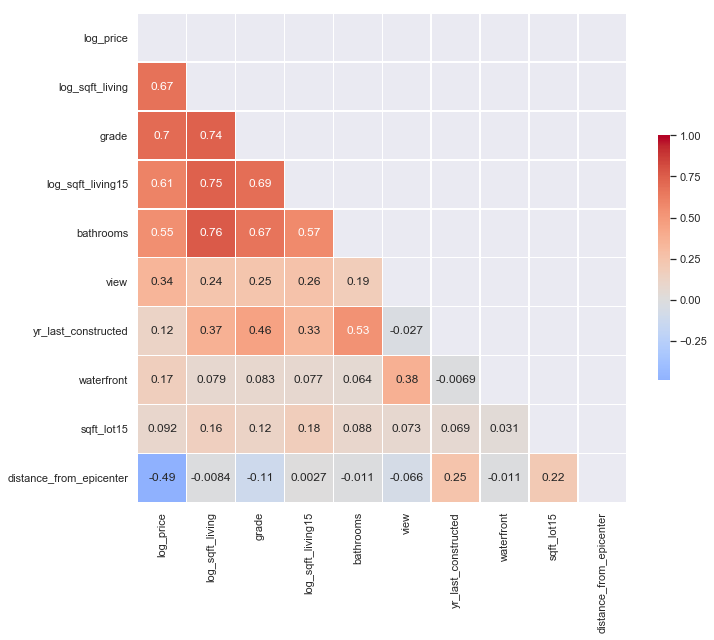

In [131]:
df7_heat = df7[['log_price','log_sqft_living', 'grade', 'log_sqft_living15', 'bathrooms',
    'view','yr_last_constructed','waterfront','sqft_lot15','distance_from_epicenter']]


corr = df7_heat.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
#There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.
#cmap="PiYG"
cmap="coolwarm"
#cmap = sns.palplot(sns.dark_palette("purple"))
#cmap = sns.dark_palette("muted", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})